# Implementazione del "Treasure Maze" in Python

## Introduzione

In questa lezione, implementeremo una soluzione al problema del **"Treasure Maze"** utilizzando Python. Il "Treasure Maze" è un labirinto bidimensionale in cui un agente deve trovare il percorso ottimale dalla posizione iniziale alla posizione del tesoro, evitando ostacoli.

Utilizzeremo le seguenti librerie:

- **AIMA-Python**: per implementare gli algoritmi di ricerca.
- **NumPy**: per la gestione delle matrici che rappresentano il labirinto.
- **Matplotlib**: per visualizzare il percorso trovato all'interno del labirinto.

## Obiettivi della lezione

- Definire formalmente il dominio e i vincoli del problema.
- Implementare la classe `TreasureMaze` derivata da `Problem` di AIMA-Python.
- Risolvere il problema utilizzando algoritmi di ricerca informata (A*) e non informata (Breadth-First Search).
- Visualizzare il percorso trovato mediante una rappresentazione grafica.

---

## Prerequisiti

Assicurarsi di avere installato le seguenti librerie:

```bash
pip install aima-python numpy matplotlib
```

---

## 1. Descrizione formale del dominio e dei vincoli

Prima di procedere con l'implementazione, definiamo formalmente il dominio e i vincoli:

- **V1**: L'agente può compiere un solo passo alla volta.
- **V2**: L'agente si può muovere solo fra stanze adiacenti (su, giù, sinistra, destra) e non può attraversare muri o ostacoli.
- **V3**: L'agente deve raggiungere una posizione obiettivo specifica nel labirinto.
- **V4**: Il labirinto è rappresentato come una griglia bidimensionale.
- **Assunzioni**:
  - Le posizioni nel labirinto sono definite da coordinate `(x, y)`.
  - Le celle possono essere libere (`0`) o contenere ostacoli (`1`).
  - La posizione iniziale e la posizione del tesoro sono note.

---

## 2. Implementazione delle classi per la ricerca nello spazio degli stati

### Importazione delle librerie

```python
import numpy as np
from aima.search import Problem, astar_search, breadth_first_tree_search
import matplotlib.pyplot as plt
```

### Definizione della classe `TreasureMaze`

Creiamo una classe `TreasureMaze` che deriva dalla classe `Problem` fornita da AIMA-Python.

```python
class TreasureMaze(Problem):
    def __init__(self, initial, goal, maze):
        """
        initial: Tupla (x, y) che rappresenta la posizione iniziale dell'agente.
        goal: Tupla (x, y) che rappresenta la posizione obiettivo.
        maze: Array bidimensionale numpy che rappresenta il labirinto.
        """
        super().__init__(initial, goal)
        self.maze = maze
        self.rows = maze.shape[0]
        self.cols = maze.shape[1]
            
    def actions(self, state):
        """Restituisce la lista delle azioni possibili nello stato dato."""
        actions = []
        x, y = state
        # Definizione delle possibili direzioni di movimento
        directions = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}
        for action, (dx, dy) in directions.items():
            new_x, new_y = x + dx, y + dy
            # Verifica che la nuova posizione sia all'interno dei limiti della griglia
            if 0 <= new_x < self.rows and 0 <= new_y < self.cols:
                # Verifica che la nuova posizione non sia un ostacolo
                if self.maze[new_x][new_y] != 1:
                    actions.append(action)
        return actions
            
    def result(self, state, action):
        """Restituisce lo stato risultante dall'esecuzione di una data azione nello stato dato."""
        x, y = state
        if action == 'Up':
            return (x - 1, y)
        elif action == 'Down':
            return (x + 1, y)
        elif action == 'Left':
            return (x, y - 1)
        elif action == 'Right':
            return (x, y + 1)
        else:
            return state  # Azione non valida
           
    def goal_test(self, state):
        """Verifica se lo stato corrente è lo stato obiettivo."""
        return state == self.goal
        
    def h(self, node):
        """Funzione euristica per A* (distanza di Manhattan)."""
        x1, y1 = node.state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)
```

#### Spiegazione dei metodi

- **`__init__`**: Inizializza il problema con lo stato iniziale, lo stato obiettivo e il labirinto.
- **`actions`**: Restituisce le azioni possibili da uno stato, verificando che le mosse siano valide.
- **`result`**: Determina lo stato successivo dato uno stato e un'azione.
- **`goal_test`**: Verifica se lo stato corrente è lo stato obiettivo.
- **`h`**: Funzione euristica per A*, utilizza la distanza di Manhattan.

---

## 3. Acquisizione e classificazione degli input

Per questa implementazione, simuleremo l'acquisizione del labirinto e delle posizioni dell'agente.

### Simulazione del labirinto

Creiamo una matrice numpy per rappresentare il labirinto. Nella matrice:

- `0` indica una cella libera.
- `1` indica un ostacolo.

```python
# Labirinto simulato
maze = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
])
```

### Definizione dello stato iniziale e dello stato obiettivo

```python
# Posizione iniziale dell'agente
initial_state = (0, 0)

# Posizione del tesoro (goal)
goal_state = (4, 4)
```

---

## 4. Risoluzione del problema

Creiamo un'istanza del problema e applichiamo gli algoritmi di ricerca.

### Creazione dell'istanza del problema

```python
# Creazione dell'istanza del problema
problem = TreasureMaze(initial_state, goal_state, maze)
```

### Risoluzione con A* Search

```python
# Risoluzione con A* Search
solution_node = astar_search(problem)
```

### Verifica della soluzione trovata

```python
if solution_node:
    actions = solution_node.solution()
    print("Soluzione trovata con A* Search:")
    print("Azioni:", actions)
    print("Costo del percorso:", solution_node.path_cost)
else:
    print("Nessuna soluzione trovata con A* Search.")
```

### Risoluzione con Breadth-First Search

```python
# Risoluzione con Breadth-First Search
solution_node_bfs = breadth_first_tree_search(problem)

if solution_node_bfs:
    actions_bfs = solution_node_bfs.solution()
    print("\nSoluzione trovata con Breadth-First Search:")
    print("Azioni:", actions_bfs)
    print("Costo del percorso:", solution_node_bfs.path_cost)
else:
    print("Nessuna soluzione trovata con Breadth-First Search.")
```

---

## 5. Esecuzione e visualizzazione del piano

### Funzione per ricostruire il percorso

Definiamo una funzione per ottenere il percorso a partire dalle azioni.

```python
def get_path(initial_state, actions, problem):
    state = initial_state
    path = [state]
    for action in actions:
        state = problem.result(state, action)
        path.append(state)
    return path
```

### Funzione per visualizzare il labirinto e il percorso

```python
def visualize_maze(maze, path):
    maze_visual = maze.copy()
    for position in path:
        x, y = position
        if maze_visual[x][y] != 0:
            continue
        maze_visual[x][y] = 2  # 2 rappresenta il percorso dell'agente

    # Configurazione della figura
    plt.figure(figsize=(5,5))
    cmap = plt.cm.Set3
    plt.imshow(maze_visual, cmap=cmap)
    cbar = plt.colorbar(ticks=[0,1,2], label='Legenda', shrink=0.7)
    cbar.ax.set_yticklabels(['Libero', 'Ostacolo', 'Percorso'])
    plt.clim(-0.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()
```

### Visualizzazione del percorso trovato con A*

```python
if solution_node:
    actions = solution_node.solution()
    path = get_path(initial_state, actions, problem)
    visualize_maze(maze, path)
```

---

## Codice completo

Riuniamo tutti i pezzi insieme per avere una visione d'insieme.

Soluzione trovata con A* Search:
Azioni: ['Right', 'Right', 'Right', 'Right', 'Down', 'Down', 'Down', 'Down']
Costo del percorso: 8


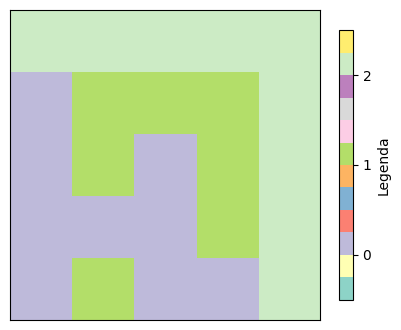


Soluzione trovata con Breadth-First Search:
Azioni: ['Down', 'Down', 'Down', 'Right', 'Right', 'Down', 'Right', 'Right']
Costo del percorso: 8


In [2]:
# Import delle librerie
import numpy as np
from aima.search import Problem, astar_search, breadth_first_tree_search
import matplotlib.pyplot as plt

# Definizione della classe TreasureMaze
class TreasureMaze(Problem):
    def __init__(self, initial, goal, maze):
        super().__init__(initial, goal)
        self.maze = maze
        self.rows = maze.shape[0]
        self.cols = maze.shape[1]
            
    def actions(self, state):
        actions = []
        x, y = state
        directions = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}
        for action, (dx, dy) in directions.items():
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.rows and 0 <= new_y < self.cols:
                if self.maze[new_x][new_y] != 1:
                    actions.append(action)
        return actions
            
    def result(self, state, action):
        x, y = state
        if action == 'Up':
            return (x - 1, y)
        elif action == 'Down':
            return (x + 1, y)
        elif action == 'Left':
            return (x, y - 1)
        elif action == 'Right':
            return (x, y + 1)
        else:
            return state
           
    def goal_test(self, state):
        return state == self.goal
        
    def h(self, node):
        x1, y1 = node.state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

# Funzioni ausiliarie
def get_path(initial_state, actions, problem):
    state = initial_state
    path = [state]
    for action in actions:
        state = problem.result(state, action)
        path.append(state)
    return path

def visualize_maze(maze, path):
    maze_visual = maze.copy()
    for position in path:
        x, y = position
        if maze_visual[x][y] != 0:
            continue
        maze_visual[x][y] = 2

    plt.figure(figsize=(5,5))
    cmap = plt.cm.Set3
    plt.imshow(maze_visual, cmap=cmap)
    cbar = plt.colorbar(ticks=[0,1,2], label='Legenda', shrink=0.7)
    cbar.ax.set_yticklabels(['Libero', 'Ostacolo', 'Percorso'])
    plt.clim(-0.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Labirinto e stati
maze = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
])

initial_state = (0, 0)
goal_state = (4, 4)

# Creazione del problema
problem = TreasureMaze(initial_state, goal_state, maze)

# Risoluzione con A* Search
solution_node = astar_search(problem)

if solution_node:
    actions = solution_node.solution()
    print("Soluzione trovata con A* Search:")
    print("Azioni:", actions)
    print("Costo del percorso:", solution_node.path_cost)
    path = get_path(initial_state, actions, problem)
    visualize_maze(maze, path)
else:
    print("Nessuna soluzione trovata con A* Search.")

# Risoluzione con Breadth-First Search
solution_node_bfs = breadth_first_tree_search(problem)

if solution_node_bfs:
    actions_bfs = solution_node_bfs.solution()
    print("\nSoluzione trovata con Breadth-First Search:")
    print("Azioni:", actions_bfs)
    print("Costo del percorso:", solution_node_bfs.path_cost)
else:
    print("Nessuna soluzione trovata con Breadth-First Search.")